<a href="https://colab.research.google.com/github/hieupc02/Twitter-Sentiment-Analysis-Using-CNN_NLP/blob/main/TTCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [228]:
#!pip install numpy
#!pip install pandas
#!pip install tensorflow
#!pip install keras


In [229]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [230]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from keras.preprocessing.text import Tokenizer
from numpy import array,asarray,zeros
#from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Tải dữ liệu imdb từ keras

In [231]:
import pandas as pd
df = pd.read_csv("/content/IMDB Dataset.csv", error_bad_lines=False)


<ipython-input-231-b3b380cab3e6>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/content/IMDB Dataset.csv", error_bad_lines=False)


In [232]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [234]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [235]:
max_features = 25000 # Số từ tối đa trong bộ từ điển
max_len = 500 # Độ dài tối đa của câu
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [236]:
print("Training entries: {}, labels: {}".format(len(x_train), len(x_test)))

Training entries: 37186, labels: 12396


In [237]:
#Kiểm tra các giá trị bị thiếu
null_values = df.isnull().sum()
null_values.index[0]
print('There are {} missing values for {} and {} missing values for {}.'.format(null_values[0],null_values.index[0],null_values[1],null_values.index[1]))

There are 0 missing values for review and 0 missing values for sentiment.


In [238]:
# Kiểm tra các giá trị trùng lặp
num_duplicates = df.duplicated().sum() #identify duplicates
print('There are {} duplicate reviews present in the dataset'.format(num_duplicates))

There are 418 duplicate reviews present in the dataset


In [239]:
#xem các bài đánh giá trùng lặp
review = df['review']
duplicated_review = df[review.isin(review[review.duplicated()])].sort_values("review")
duplicated_review.head()

,review,sentiment
34058,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
47467,"""Go Fish"" garnered Rose Troche rightly or wron...",negative
29956,"""Three"" is a seriously dumb shipwreck movie. M...",negative
31488,"""Three"" is a seriously dumb shipwreck movie. M...",negative
47527,"""Witchery"" might just be the most incoherent a...",negative


In [240]:
# Bỏ các bài đánh giá trùng lặp
df.drop_duplicates(inplace = True)
print('The dataset contains {} rows and {} columns after removing duplicates'.format(df.shape[0],df.shape[1]))

The dataset contains 49582 rows and 2 columns after removing duplicates


In [241]:
#chuyển đổi biến mục tiêu thành nhãn số
df.sentiment = [ 1 if each == "positive" else 0 for each in df.sentiment]

In [242]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


<Axes: title={'center': 'Số lượng mục tiêu cho các bài đánh giá IMDB'}, xlabel='sentiment', ylabel='count'>

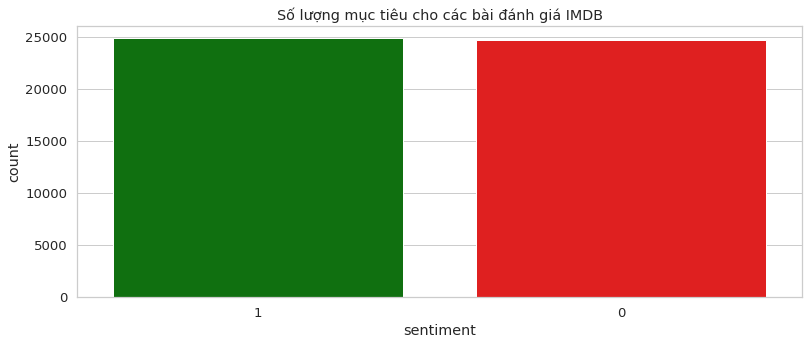

In [243]:
#sns.set(style="whitegrid", font_scale=1.2)
#sns.countplot(x="sentiment", data=df, palette=['green', 'red'], order=[1, 0])
#plt.xticks(ticks=np.arange(2), labels=['positive', 'negative'])
#plt.title('Số lượng mục tiêu cho các bài đánh giá IMDB')
#plt.show()
plt.figure(figsize=(13,5))
plt.title('Số lượng mục tiêu cho các bài đánh giá IMDB')
sns.countplot(x='sentiment',data=df, palette=['green', 'red'], order=[1, 0])


Độ dài tối đa:13704,Độ dài nhỏ nhất:32, Độ dài trung bình:1310.5682304061959


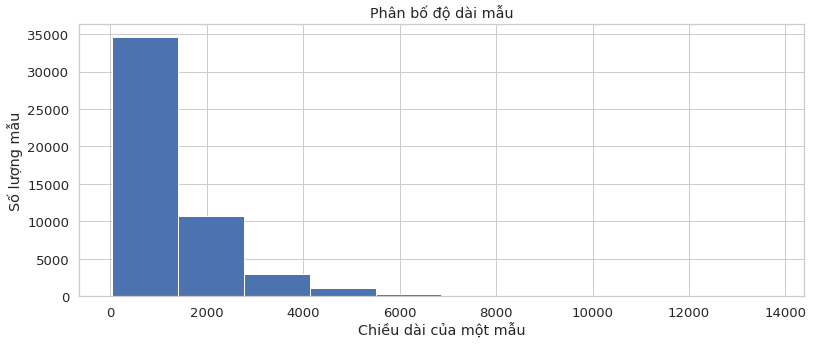

In [244]:
plt.figure(figsize=(13,5))
df['len']= df['review'].str.len()
print('Độ dài tối đa:{},Độ dài nhỏ nhất:{}, Độ dài trung bình:{}'.format(max(df['len']),min(df['len']),df['len'].mean()))
df['len'].hist()
plt.xlabel('Chiều dài của một mẫu')
plt.ylabel('Số lượng mẫu')
plt.title('Phân bố độ dài mẫu')
plt.show()

Vector hoá văn bản

In [245]:
example_sentences = df['review'].loc[2]
example_sentences

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [246]:
# 3. Chuyển qua từ thường(LowerCase)
example_sentences = example_sentences.lower()
example_sentences

'i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.<br /><br />this was the most i\'d laughed at one of woody\'s comedies in years (dare i say a decade?). while i\'ve never been impressed with scarlet johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />this may not be the crown jewel of his career, but it was wittier than "devil wears prada" and more interesting than "superman" a great comedy to go see with friends.'

In [247]:
# Khởi tạo một kho(imdb) để chứa dữ liệu câu
imdb = []
imdb.append(example_sentences)

In [248]:
# Vector hóa câu bằng mô hình túi từ (Bag of Words)--> chúng ta sẽ thấy có số 1,2 & 3...
dem_vecto = CountVectorizer()
sentences_dem_vecto = dem_vecto.fit_transform(imdb)
sentences_dem_vecto.toarray()

array([[1, 1, 1, 4, 1, 1, 1, 2, 1, 4, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 2, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 8,
        1, 1, 5, 2, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
        1, 2, 1, 1]])

In [249]:
# biến đổi túi từ thành 1- Vectorizer với Binary = True sẽ làm được việc đó
dem_vecto_bin = CountVectorizer(binary=True)
sentences_dem_vecto_bin = dem_vecto_bin.fit_transform(imdb)
sentences_dem_vecto_bin.toarray()

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1]])

In [250]:
tfidf_vecto = TfidfVectorizer()
sentences_tfidf_vecto = tfidf_vecto.fit_transform(imdb)
sentences_tfidf_vecto.toarray()

array([[0.05391639, 0.05391639, 0.05391639, 0.21566555, 0.05391639,
        0.05391639, 0.05391639, 0.10783277, 0.05391639, 0.21566555,
        0.05391639, 0.16174916, 0.05391639, 0.05391639, 0.05391639,
        0.10783277, 0.05391639, 0.05391639, 0.05391639, 0.05391639,
        0.05391639, 0.05391639, 0.05391639, 0.05391639, 0.05391639,
        0.05391639, 0.05391639, 0.05391639, 0.05391639, 0.05391639,
        0.05391639, 0.05391639, 0.05391639, 0.05391639, 0.05391639,
        0.05391639, 0.05391639, 0.05391639, 0.21566555, 0.05391639,
        0.05391639, 0.21566555, 0.10783277, 0.05391639, 0.05391639,
        0.05391639, 0.05391639, 0.05391639, 0.05391639, 0.05391639,
        0.05391639, 0.05391639, 0.05391639, 0.05391639, 0.10783277,
        0.05391639, 0.05391639, 0.05391639, 0.10783277, 0.21566555,
        0.05391639, 0.05391639, 0.05391639, 0.05391639, 0.05391639,
        0.05391639, 0.05391639, 0.05391639, 0.05391639, 0.05391639,
        0.05391639, 0.05391639, 0.05391639, 0.05

In [251]:
x_train, x_test, y_train, y_test= train_test_split(df['review'], df['sentiment'], test_size=0.25, random_state=42)
y_train = (y_train.replace({'positive': 1, 'negative': 0})).values
y_test  = (y_test.replace({'positive': 1, 'negative': 0})).values
print(y_train)
print(y_test)

[1 1 1 ... 0 1 1]
[0 1 0 ... 0 0 0]


# Xây dựng mô hình


In [252]:
# Tạo một từ để lập chỉ mục từ điển từ mô đun tokenizer 
# Mỗi từ được sử dụng làm khóa trong khi chỉ mục duy nhất tương ứng và được sử dụng làm giá trị cho khóa.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [253]:
do_dai_danhsach_x = [len(i) for i in x_train + x_test]
print(f'Độ dài tối đa của câu:{max(do_dai_danhsach_x)}')
print(f'Độ dài trung bình của câu:{np.mean(do_dai_danhsach_x)}')

Độ dài tối đa của câu:2117
Độ dài trung bình của câu:211.72713888104553


<ipython-input-254-7f7d12285fce>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(do_dai_danhsach_x, color='red',label="Độ dài danh sách")


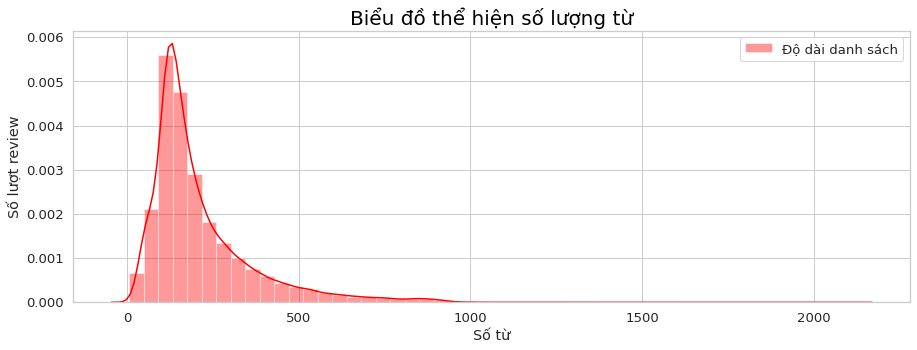

In [254]:
# Sử dụng seaborn để vẽ độ dài câu
#plt.figure(figsize=(15,5), dpi= 80)
fig, ax = plt.subplots(figsize=(15,5))
sns.distplot(do_dai_danhsach_x, color='red',label="Độ dài danh sách")
plt.title('Biểu đồ thể hiện số lượng từ',fontsize=20,color='black')
ax.legend()
ax.set(xlabel='Số từ',ylabel='Số lượt review')
plt.show()

In [255]:
vocabulary_size = len(tokenizer.word_index) + 1
maxlength = 100

x_train_padding = pad_sequences(x_train, padding="post",maxlen=maxlength)
x_test_padding = pad_sequences(x_test, padding="post",maxlen=maxlength)
# Kiểm tra danh sách ngẫu nhiên trong X_train (các câu trước đó)
# có cùng độ dài là 100
len(x_train[3])

245

In [256]:
# Kiểm tra xíu
x_train_padding

array([[  12,    1,    8, ...,  106,  220,  513],
       [  81,  502,    1, ...,   52,  425,  120],
       [  31,   24,  323, ...,   17,  126, 1509],
       ...,
       [  78, 4134,   26, ...,    3,  455,  156],
       [  11,  354,   13, ...,    0,    0,    0],
       [   2,    3, 1027, ...,    4,    1, 2881]], dtype=int32)

In [257]:
vocabulary_size

108952

In [258]:
tudien_duoc_nhung = dict()
glove_file = open('/content/glove.6B.100d.txt',encoding='utf-8')
for line in glove_file:
    record = line.split()
    word = record[0]
    kich_thuoc = asarray(record[1:], dtype = "float32")
    tudien_duoc_nhung[word] = kich_thuoc
glove_file.close()

In [259]:
ma_tran_nhung = zeros((vocabulary_size,100))
for word, index in tokenizer.word_index.items():
    vecto_nhung = tudien_duoc_nhung.get(word)
    if vecto_nhung is not None:
        ma_tran_nhung[index] = vecto_nhung

In [260]:
vecto_nhung

In [261]:
ma_tran_nhung

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.28059   , -0.027038  ,  0.073588  , ...,  0.16734   ,
        -0.54356998,  0.2061    ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [267]:
mo_hinh = Sequential()
lop_nhung = Embedding(vocabulary_size, 100, weights = [ma_tran_nhung],input_length=maxlength,trainable=False)
mo_hinh.add(lop_nhung)
mo_hinh.add(Conv1D(128, 5, activation='relu'))
mo_hinh.add(GlobalMaxPooling1D())
mo_hinh.add(Dropout(0.2)),
mo_hinh.add(Flatten())
mo_hinh.add(Dense(1, activation = 'sigmoid'))
mo_hinh.add(Dense(64, activation='tanh'))
mo_hinh.add(Dropout(0.5))
mo_hinh.add(Dense(1, activation='softmax'))
mo_hinh.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['acc'])
print(mo_hinh.summary())


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          10895200  
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 flatten_3 (Flatten)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                      

# Huấn luyện và đánh giá mô hình

In [270]:
#mo_hinh.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))
#score, acc = mo_hinh.evaluate(x_test, y_test, batch_size=64)
#print('Test score:', score)
#print('Test accuracy:', acc)

history = mo_hinh.fit(x_train_padding, y_train, batch_size=128,epochs = 10, verbose=1, validation_split=0.2)

Epoch 1/10
233/233 [==============================] - 23s 99ms/step - loss: 0.3088 - acc: 0.5017 - val_loss: 0.3747 - val_acc: 0.5015
Epoch 2/10
233/233 [==============================] - 25s 109ms/step - loss: 0.2746 - acc: 0.5017 - val_loss: 0.4002 - val_acc: 0.5015
Epoch 3/10
233/233 [==============================] - 34s 148ms/step - loss: 0.2417 - acc: 0.5017 - val_loss: 0.4513 - val_acc: 0.5015
Epoch 4/10
233/233 [==============================] - 28s 120ms/step - loss: 0.2114 - acc: 0.5017 - val_loss: 0.3932 - val_acc: 0.5015
Epoch 5/10
233/233 [==============================] - 30s 128ms/step - loss: 0.1840 - acc: 0.5017 - val_loss: 0.4127 - val_acc: 0.5015
Epoch 6/10
233/233 [==============================] - 36s 152ms/step - loss: 0.1645 - acc: 0.5017 - val_loss: 0.4416 - val_acc: 0.5015
Epoch 7/10
233/233 [==============================] - 27s 114ms/step - loss: 0.1528 - acc: 0.5017 - val_loss: 0.4440 - val_acc: 0.5015
Epoch 8/10
233/233 [==============================] - 24

In [271]:
accuracy_score = mo_hinh.evaluate(x_test_padding, y_test, verbose = 1)

388/388 [==============================] - 7s 18ms/step - loss: 0.5334 - acc: 0.5024


In [272]:
du_doan_y = mo_hinh.predict(x_test_padding)
du_doan_y = np.round(du_doan_y).astype(int)
print(classification_report(y_test,du_doan_y))

388/388 [==============================] - 4s 10ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6168
           1       0.50      1.00      0.67      6228

    accuracy                           0.50     12396
   macro avg       0.25      0.50      0.33     12396
weighted avg       0.25      0.50      0.34     12396



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [273]:
#Kiểm tra độ chính xác
print("Test Score: {:.2%}".format(accuracy_score[0]))
print("Test Accuracy: {:.2%}".format(accuracy_score[1]))

Test Score: 53.34%
Test Accuracy: 50.24%
